### Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

### Load the Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Scaling the Data

In [4]:
X_train = X_train / 255
X_test = X_test / 255.

In [5]:
print(X_train[0].shape) # Rows and columns
print(X_train[0].size) # gives total no. of elements

(28, 28)
784


In [6]:
y_train.shape

(60000,)

### Build the Model

In [9]:
model= Sequential()

# original Size = 28*28*1

# 1st Convolution Layer
model.add(Conv2D(32, 3,
                 activation='relu',
                 input_shape=(28,28,1)
                 )) # 26*26*32

model.add(MaxPool2D((2, 2))) # 13*13*32

# 2nd Convolution Layer
model.add(Conv2D(16, 3,
                 activation='relu',
                 )) # 11*11*16

model.add(MaxPool2D((2, 2))) # 5*5*16

model.add(Flatten()) # 400

model.add(Dense(256, activation='relu')) # reduced to 256 nodes

model.add(Dense(128, activation='relu')) # 128 Nodes

model.add(Dense(10, activation='softmax')) # 10 nodes

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train,
          epochs=10,
          batch_size=10
          )

Epoch 1/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0487 - accuracy: 0.9850
Epoch 2/10
6000/6000 [==============================] - 29s 5ms/step - loss: 0.0357 - accuracy: 0.9895
Epoch 3/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0271 - accuracy: 0.9918
Epoch 4/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0220 - accuracy: 0.9931
Epoch 5/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0195 - accuracy: 0.9944
Epoch 6/10
6000/6000 [==============================] - 29s 5ms/step - loss: 0.0165 - accuracy: 0.9949
Epoch 7/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0158 - accuracy: 0.9952
Epoch 8/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0152 - accuracy: 0.9957
Epoch 9/10
6000/6000 [==============================] - 29s 5ms/step - loss: 0.0122 - accuracy: 0.9966
Epoch 10/10
6000/6000 [==============================] - 29s 5ms/step - l

In [16]:
model.evaluate(X_test, y_test, batch_size=1)

10000/10000 [==============================] - 31s 3ms/step - loss: 0.0636 - accuracy: 0.9885


[0.06362426280975342, 0.9884999990463257]

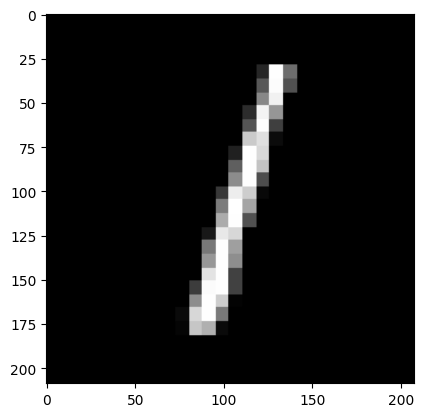

In [36]:
import cv2
image = cv2.imread('Test.png',0)
plt.imshow(image, cmap="gray")

In [37]:
image = cv2.resize(image, (28,28))

In [38]:
image.shape

(28, 28)

In [39]:
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  38, 254, 109,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  87, 252,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [40]:
image = image / 255
image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [42]:
image = image.reshape(-1,image.shape[0], image.shape[1])
image.shape 

(1, 28, 28)

In [43]:
model.predict(image).argmax()

1/1 [==============================] - 0s 109ms/step


1